<a href="https://colab.research.google.com/github/KK-Niraj/California-Housing-Price/blob/main/California_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading California Housing data

In [2]:
# File path to read
file_path = "/content/housing.csv"

In [3]:
df = pd.read_csv(file_path)
# First 5 Data points
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Last 5 Data points
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
# List all column names in the dataframe
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
# Dataframe info about data type and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# List all unique data ponits in a categorical column
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
# Calculate and display the frequency of each category in the 'ocean_proximity' column
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


# Missing Data Analysis

In [9]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(df)) * 100

# Display the missing statistics
print("Missing values in each column:\n", missing_values)
print("\nPercentage of Missing data:\n", missing_percentage)

Missing values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [10]:
# Checking the missing values row
missing_df = df[df["total_bedrooms"].isnull()]
missing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [11]:
# Calculate and display the frequency of each category in the 'ocean_proximity' column for the data points with missing values in other columns
missing_df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,102
INLAND,55
NEAR OCEAN,30
NEAR BAY,20


In [12]:
# Remove rows with missing values
data_cleaned = df.dropna(axis=0)

# Verify that missing values have been removed
print("Missing values in each column after removal:\n", data_cleaned.isnull().sum())

Missing values in each column after removal:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Data Exploration and Visualization

In [13]:
# Exploring descriptive statistical parameters
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


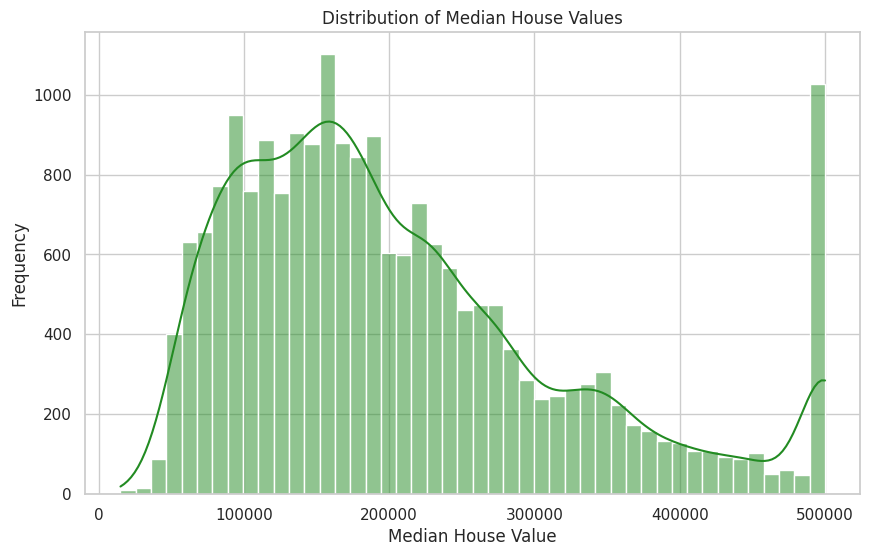

In [14]:
# Plotting dependent varaible
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned["median_house_value"], color="forestgreen", kde=True)
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

# Using InterQuartile Range to Remove Outliers

In [15]:
# Using cleaned DataFrame find the Quantile range for 'median_house_value' column
Q1 = data_cleaned["median_house_value"].quantile(0.25)
Q3 = data_cleaned["median_house_value"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_1 = data_cleaned[(data_cleaned["median_house_value"] >= lower_bound) & (data_cleaned["median_house_value"] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data Shape:", data_cleaned.shape)
print("After removal of outliers data shape:", data_no_outliers_1.shape)

Original data Shape: (20433, 10)
After removal of outliers data shape: (19369, 10)


In [16]:
# Calculate and display the frequency of each category in the 'ocean_proximity' column for the dataframe after outlier removal.
data_no_outliers_1["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,8453
INLAND,6464
NEAR OCEAN,2392
NEAR BAY,2055
ISLAND,5


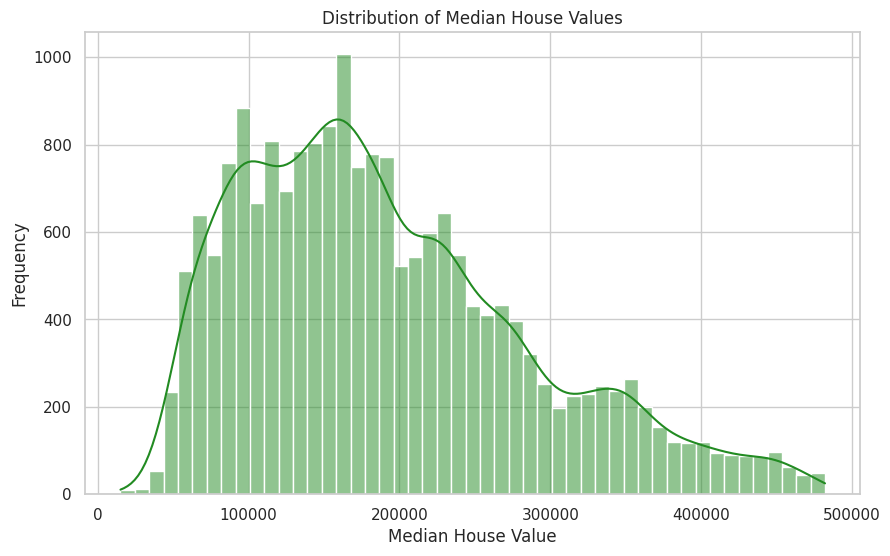

In [17]:
# Plotting dependent varaible after removal of outliers
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_no_outliers_1["median_house_value"], color="forestgreen", kde=True)
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

# BoxPlot for Outlier Detection

### Outliers in Median Income

In [18]:
# Create numeric columns list.
numeric_columns = data_no_outliers_1.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [19]:
# Create a function to rewrite the column Name without underscores and also capitalize the first Letter of the words
def capitalize_column_name(name):
  """Capitalizes the column name.

  If the column name contains underscores, it splits the name into words,
  capitalizes each word, and joins them back with spaces.
  If there are no underscores, it simply capitalizes the first letter
  of the column name.

  Args:
    name: The name of the column.

  Returns:
    The capitalized column name.
  """

  # Check if the column name contains underscores
  if "_" in name:
    # If yes, split the name into words, capitalize each word,
    # and join them back with spaces
    return " ".join(word.capitalize() for word in name.split("_"))
  else:
    # If no, simply capitalize the first letter of the column name
    return name.capitalize()

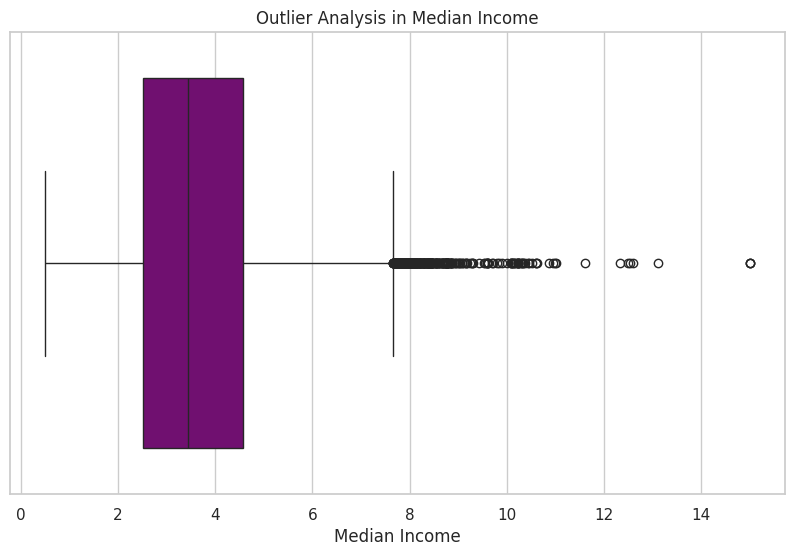

In [20]:
# Plotting boxplot of 'median_income' column for outlier analysis or detection
plt.figure(figsize=(10,6))
sns.boxplot(x=data_no_outliers_1["median_income"], color="purple")
plt.title("Outlier Analysis in Median Income")
plt.xlabel("Median Income")
plt.show()

In [21]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1["median_income"].quantile(0.25)
Q3 = data_no_outliers_1["median_income"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove Outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1["median_income"] >= lower_bound) & (data_no_outliers_1["median_income"] <= upper_bound)]

# Check the shape of the DataFrame after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("After removal of outliers data shape:", data_no_outliers_2.shape)

Original data shape: (19369, 10)
After removal of outliers data shape: (19026, 10)


In [22]:
# Creating a copy of the DataFrame
df_1 = data_no_outliers_2.copy()

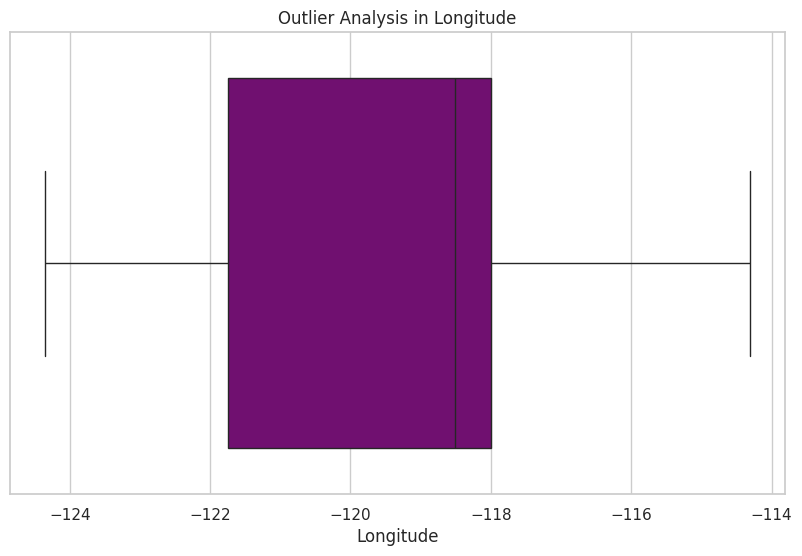

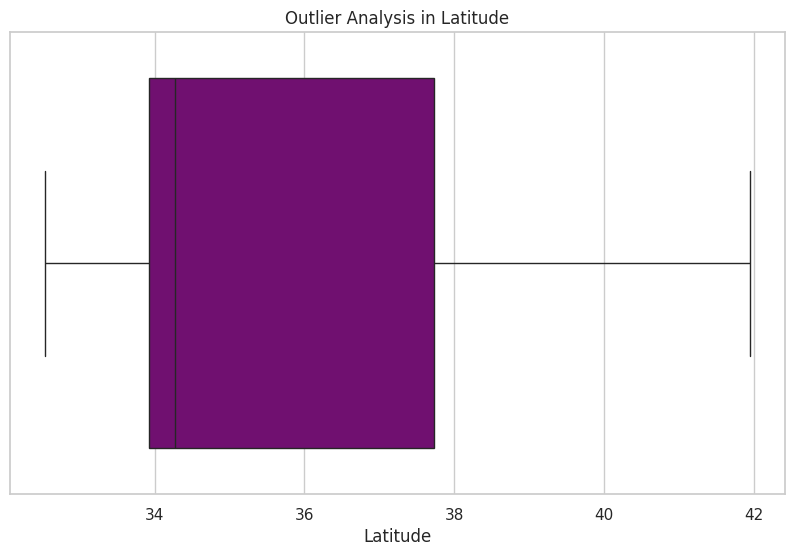

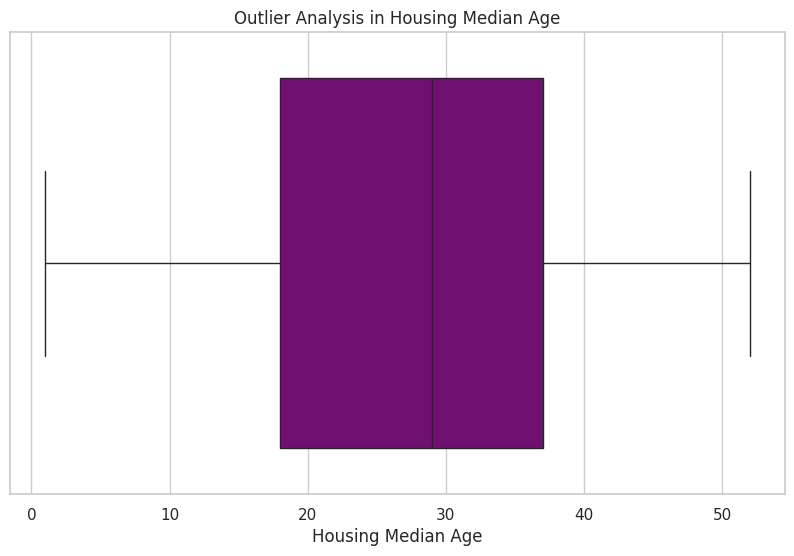

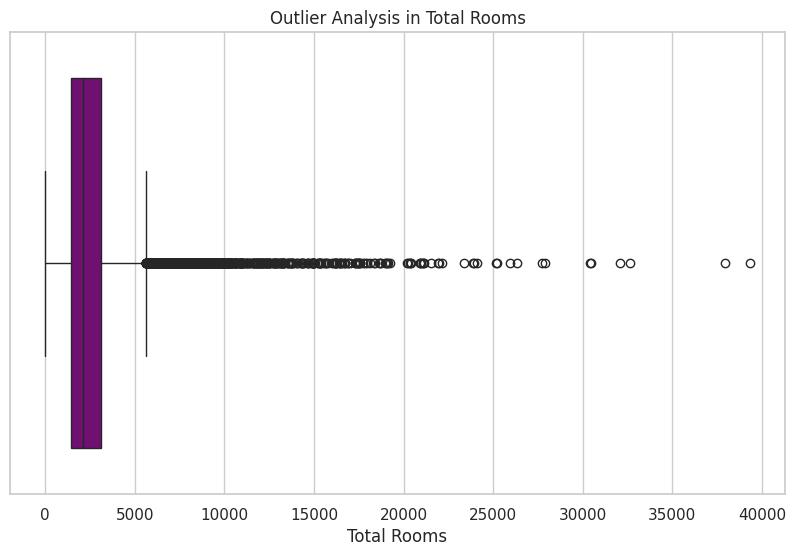

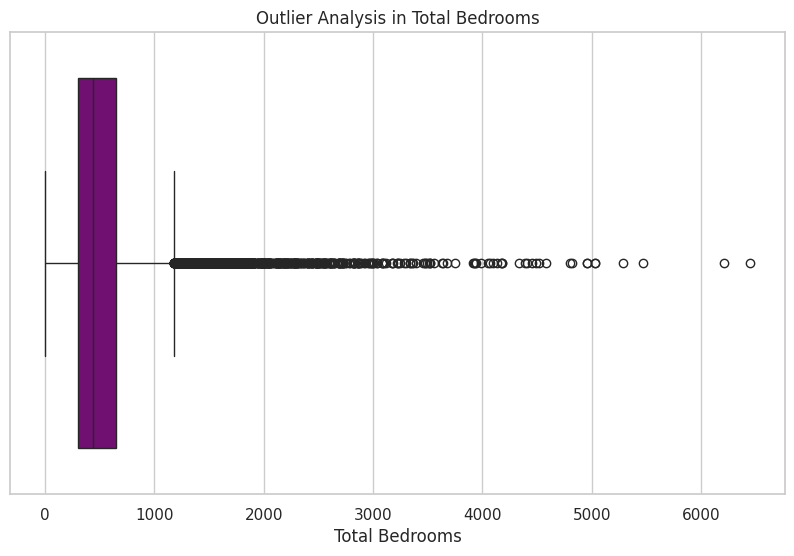

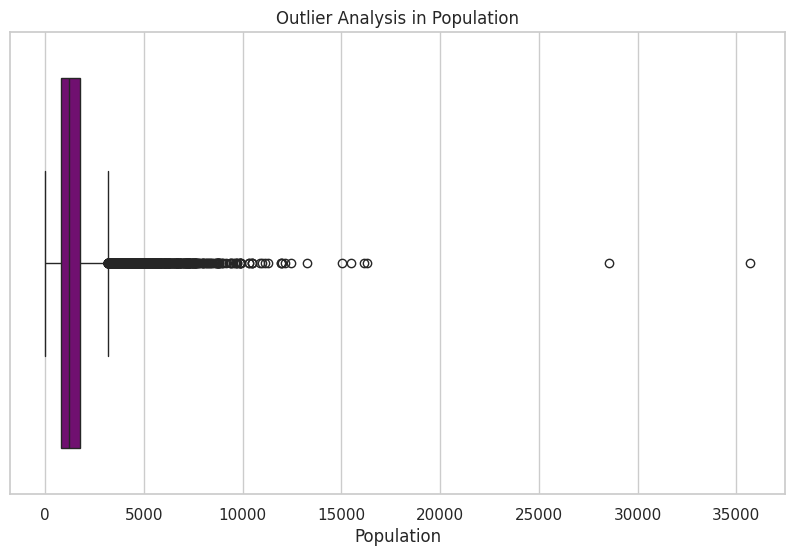

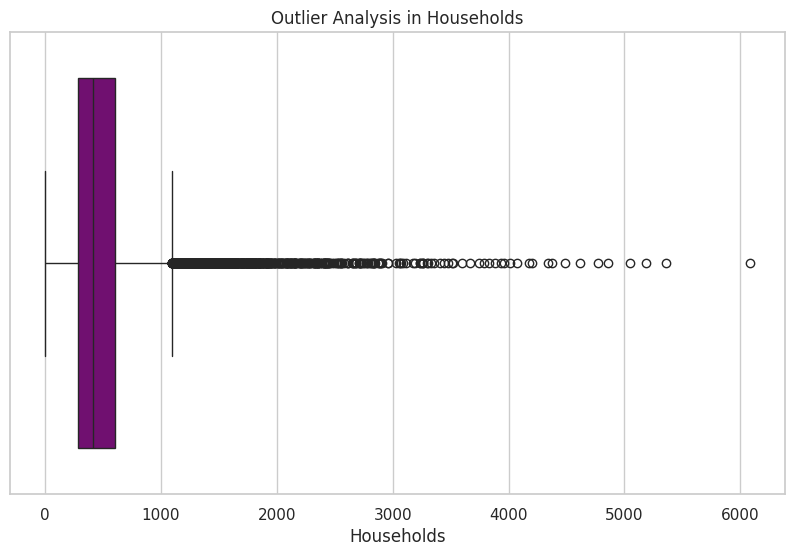

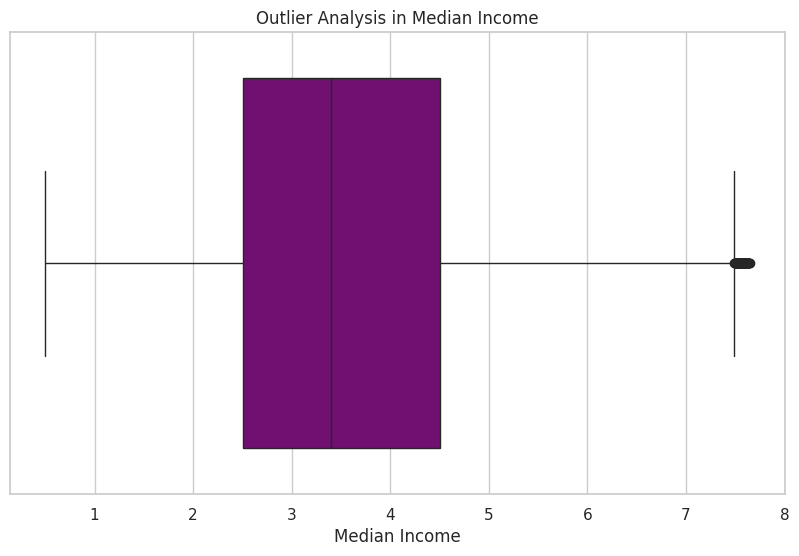

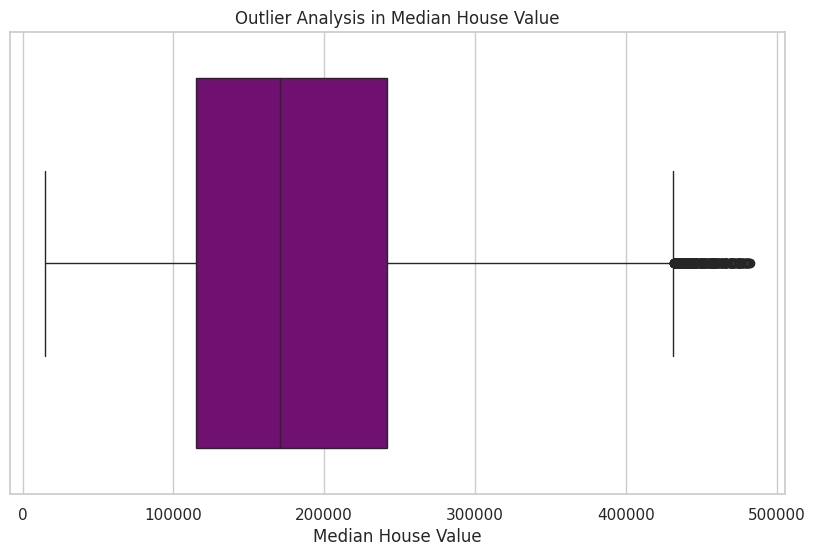

In [23]:
# Plotting box plot of numeric columns to check oultliers
for col in numeric_columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df_1[col], color="purple")
  col_name = capitalize_column_name(col)
  plt.title(f"Outlier Analysis in {col_name}")
  plt.xlabel(col_name)
  plt.show()

# Correlation HeatMap

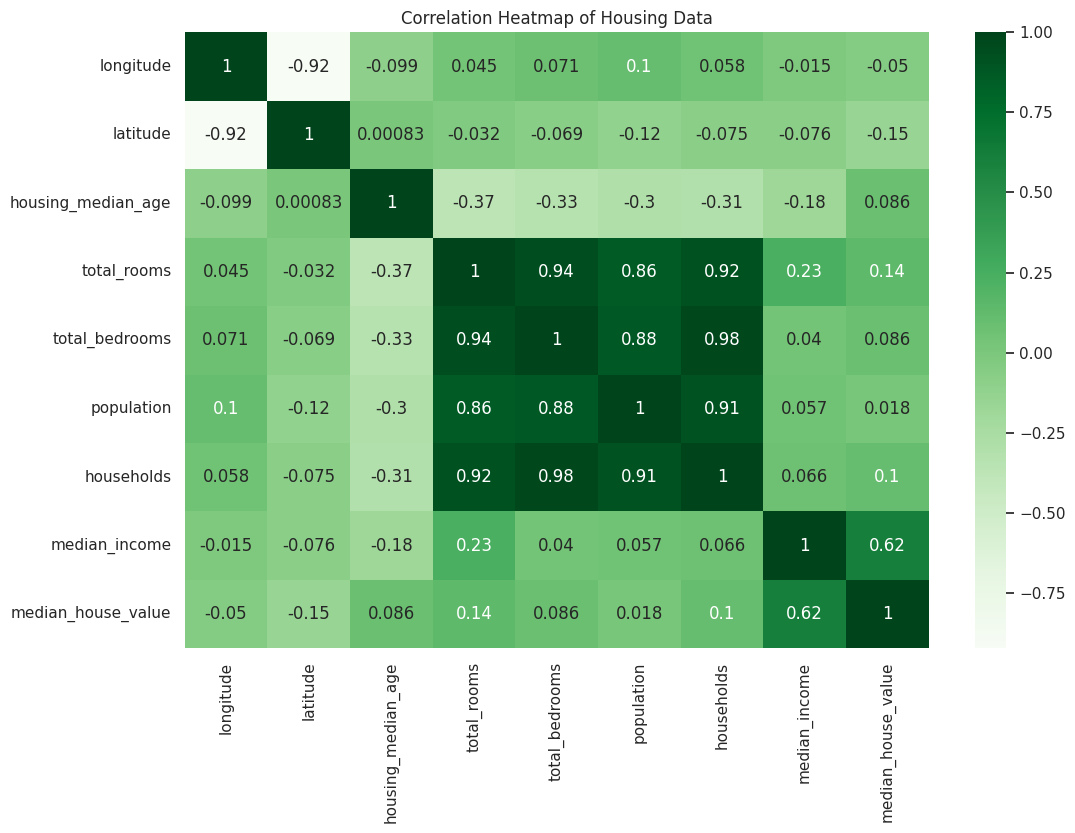

In [24]:
# Plot the heatmap for correlation between variables or features
plt.figure(figsize=(12,8))
sns.heatmap(df_1[numeric_columns].corr(), annot=True, cmap="Greens")
plt.title("Correlation Heatmap of Housing Data")
plt.show()

In [25]:
# Dropping the 'total_bedrooms' column
df_1 = df_1.drop("total_bedrooms", axis=1)
df_1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [26]:
# Unique value for catgegorical data
print("Unique values in ocean proximity column:", df_1["ocean_proximity"].unique())

Unique values in ocean proximity column: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


# String Data Categorization to Dummy Variables

In [27]:
# Creating dummy variables for categorical column and dropping the categorical column
ocean_proximity_dummies = pd.get_dummies(df_1["ocean_proximity"], prefix="ocean_proximity", dtype=int)
df_1 = pd.concat([df_1.drop("ocean_proximity", axis=1), ocean_proximity_dummies], axis=1).reset_index(drop=True)
df_1

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
1,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
2,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
3,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
4,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19021,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
19022,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
19023,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
19024,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [28]:
# List of columns in the DataFrame
df_1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [29]:
# Dropping the column 'ocean_proximity_ISLAND' for avoiding perfect multicollinearity
df_1.drop("ocean_proximity_ISLAND", axis=1, inplace=True)
df_1.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
1,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
2,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
3,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
4,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
5,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,1,0
6,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,1,0
7,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,1,0
8,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,1,0
9,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,1,0


# Splitting Data to Train and Test

In [30]:
numeric_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [31]:
numeric_columns = numeric_columns.drop("total_bedrooms")
numeric_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value'],
      dtype='object')

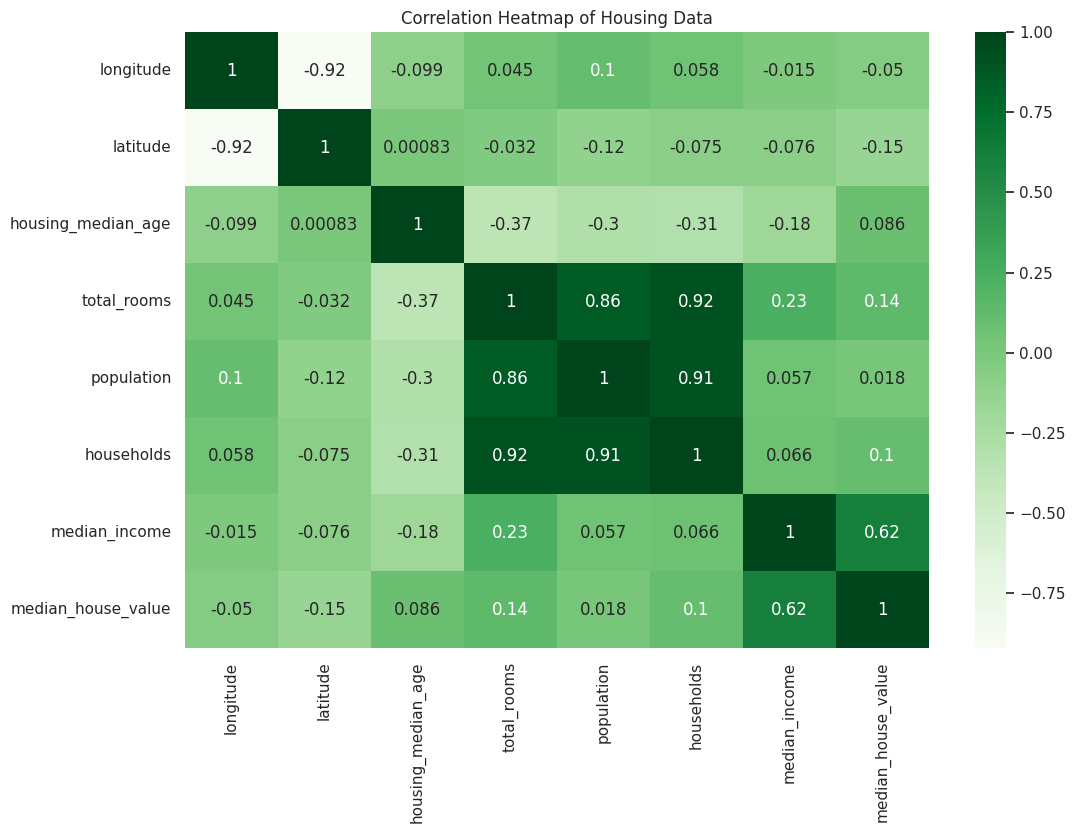

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df_1[numeric_columns].corr(), annot=True, cmap="Greens")
plt.title("Correlation Heatmap of Housing Data")
plt.show()

In [33]:
# Define your features (independent variables) and target (dependent variable)
features = ["longitude", "latitude", "housing_median_age", "total_rooms", "population", "households", "median_income", "ocean_proximity_<1H OCEAN", "ocean_proximity_INLAND", "ocean_proximity_NEAR BAY", "ocean_proximity_NEAR OCEAN"]
target = ["median_house_value"]

X = df_1[features]
y = df_1[target]

# Split the data into a training set and a testing set
# test_size specifies the proprtion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print("Training set size: ", X_train.shape[0], " samples")
print("Test set size: ", X_test.shape[0], " samples")

Training set size:  15220  samples
Test set size:  3806  samples


## Training

In [34]:
# Adding a constant to the predictors beacuse statsmodels OLS doesn't include it by default
X_train_sm = sm.add_constant(X_train)

# Fit the OLS Model
model_fitted = sm.OLS(y_train, X_train_sm).fit()

# Print Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):               0.00
Time:                        05:34:02   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Prediction/Testing

In [35]:
# Adding a constant to the test predictors
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_sm)

# Checking OLS Assumptions

## Assumption 1: Linearity

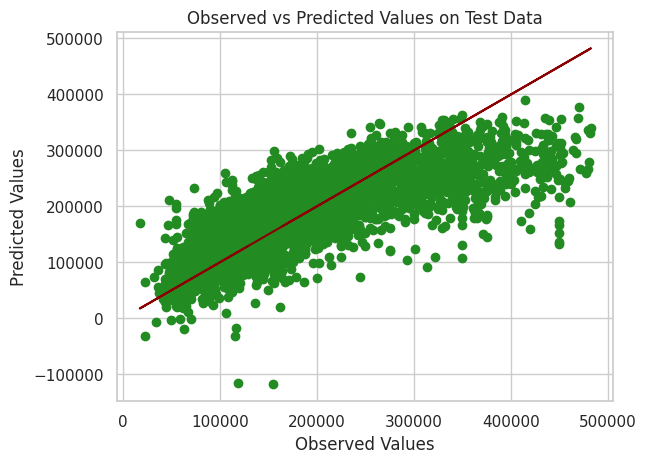

In [36]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color="forestgreen")
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Observed vs Predicted Values on Test Data")
plt.plot(y_test, y_test, color="darkred") # Line for perfect prediction (true values)
plt.show()

**Positive Linear Relationship:** The red line (which representsa perfect prediction line) and the distribution of the data points suggest there's
a positive linear relationship between the ebserved and predicted values. This means that as the actual values increase, the predicted values also increase, which is a good sign for linearity.

## Assumption 2: Random Sample

In [37]:
# Calculate the mean of residuals
mean_residuals = np.mean(model_fitted.resid)

print("The mean of the residuals is", np.round(mean_residuals, 2))

The mean of the residuals is 0.0


While we cannot directly the true errors in the model, we can work with the residuals, which are the difference between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic pattern.

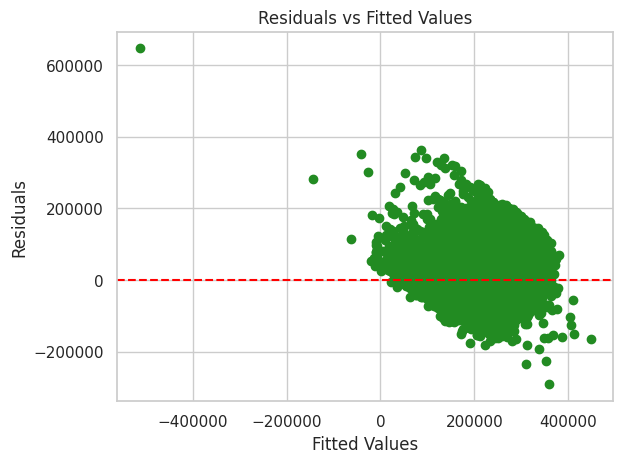

In [38]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color="forestgreen")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend. If there's a pattern, or if the residuals show a systematic deviation from zero, it could suggest issues such as model misspecification, non-linearity, or omitted variable bias.